In [24]:
from geo_util import MapTile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

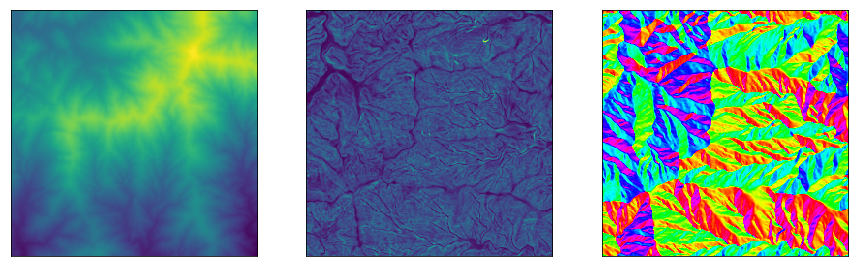

In [2]:
# 標高タイル
nabewari_tile= MapTile([13, 7262, 3232], tile_type="dem", ext="txt")
# 勾配の絶対値
norm = np.array([[nabewari_tile.grad_norm(i, j) for j in range(255)] for i in range(255)])
# 勾配の方向
angle = np.array([[nabewari_tile.grad_angle(i, j) for j in range(255)] for i in range(255)])

figsize(15, 5)
fig = plt.figure()
ax1 = fig.add_subplot(131, xticks=[], yticks=[])
ax1.imshow(nabewari_tile.data)
ax2 = fig.add_subplot(132, xticks=[], yticks=[])
ax2.imshow(norm)
ax3 = fig.add_subplot(133, xticks=[], yticks=[])
ax3.imshow(angle, cmap="hsv")

In [28]:
X, Y = np.meshgrid(np.arange(0, 255), np.arange(0, 255))
X, Y = X+0.5, Y+0.5
X, Y

(array([[   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5],
        [   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5],
        [   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5],
        ..., 
        [   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5],
        [   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5],
        [   0.5,    1.5,    2.5, ...,  252.5,  253.5,  254.5]]),
 array([[   0.5,    0.5,    0.5, ...,    0.5,    0.5,    0.5],
        [   1.5,    1.5,    1.5, ...,    1.5,    1.5,    1.5],
        [   2.5,    2.5,    2.5, ...,    2.5,    2.5,    2.5],
        ..., 
        [ 252.5,  252.5,  252.5, ...,  252.5,  252.5,  252.5],
        [ 253.5,  253.5,  253.5, ...,  253.5,  253.5,  253.5],
        [ 254.5,  254.5,  254.5, ...,  254.5,  254.5,  254.5]]))

In [29]:
Gx = np.array([[nabewari_tile.grad(i, j)[0] for j in range(255)] for i in range(255)])
Gy = np.array([[nabewari_tile.grad(i, j)[1] for j in range(255)] for i in range(255)])
Gx.shape, Gy.shape

((255, 255), (255, 255))

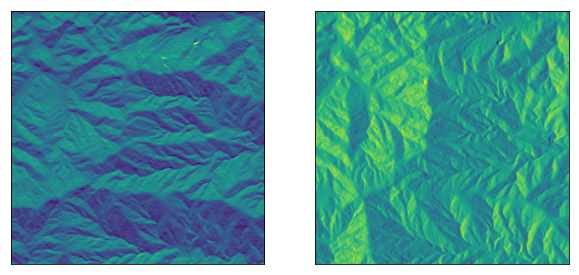

In [30]:
figsize(10, 5)
fig = plt.figure()
ax1 = fig.add_subplot(121, xticks=[], yticks=[])
ax1.imshow(Gx)
ax2 = fig.add_subplot(122, xticks=[], yticks=[])
ax2.imshow(Gy)

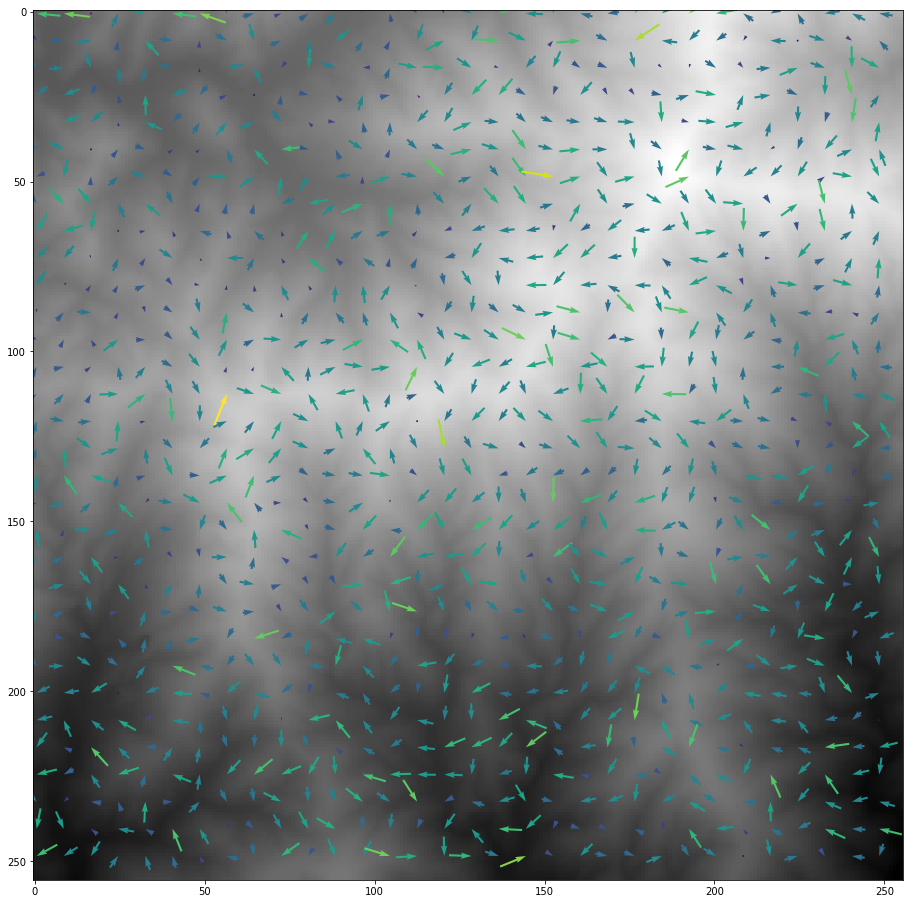

In [31]:
figsize(16, 16)
M = np.hypot(Gx, Gy)
Q = plt.quiver(X[::8, ::8], Y[::8, ::8], Gx[::8, ::8], Gy[::8, ::8], M[::8, ::8], units='width', pivot='tip')
plt.imshow(nabewari_tile.data, cmap="gray", interpolation="none")
plt.show()

ずれてる気がする